In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [20]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

In [21]:
def plot_loss_tf(history):
    fig, ax = plt.subplots(1,1, figsize = (4,3))
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

In [22]:
def plot_images(X, y, model=None):
    m, n = X.shape
    fig, axes = plt.subplots(8,8, figsize=(5,5))
    fig.tight_layout(pad=0.13)
    for i,ax in enumerate(axes.flat):
        random_index = np.random.randint(m)
        X_random_reshaped = X[random_index].reshape((20, 20)).T
        ax.imshow(X_random_reshaped, cmap='gray')
        if model is not None:
            prediction = model.predict(X[random_index].reshape(1,400))
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)
            ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
        else: 
            ax.set_title(y[random_index, 0])
        ax.set_axis_off()

Load data

In [23]:
X = np.load("/Users/arina/study/ds/coursera/ml_specialization/machine_learning_specialization/code/machine_learning_specialization/utils/X.npy")
y = np.load("/Users/arina/study/ds/coursera/ml_specialization/machine_learning_specialization/code/machine_learning_specialization/utils/y.npy")
X.shape, y.shape

((5000, 400), (5000, 1))

Visualize

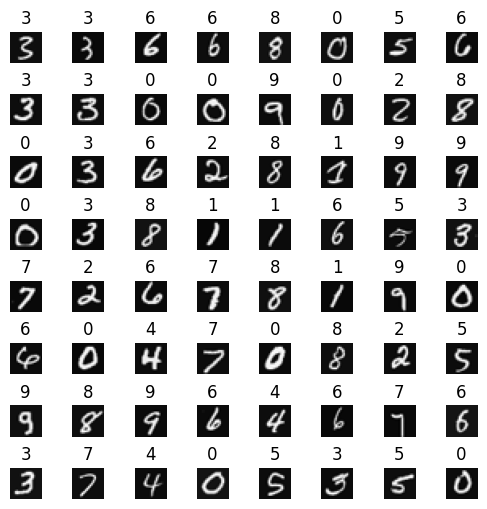

In [24]:
plot_images(X, y)

In [25]:
tf.random.set_seed(1) 
model = Sequential(
    [
        tf.keras.Input(shape=(400,)), 
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(10, activation='linear'),
    ], name = "my_model" 
)

In [26]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                10025     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [27]:
[layer1, layer2, layer3] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"{W1.shape = }, {b1.shape = }")
print(f"{W2.shape = }, {b2.shape = }")
print(f"{W3.shape = }, {b3.shape = }")

W1.shape = (400, 25), b1.shape = (25,)
W2.shape = (25, 15), b2.shape = (15,)
W3.shape = (15, 10), b3.shape = (10,)


In [28]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)
history = model.fit(X, y, epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.4831
Epoch 2/40
157/157 [==============================] - 0s 1ms/step - loss: 0.5626
Epoch 3/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3850
Epoch 4/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3191
Epoch 5/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2829
Epoch 6/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2632
Epoch 7/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2335
Epoch 8/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2184
Epoch 9/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2021
Epoch 10/40
157/157 [==============================] - 0s 1ms/step - loss: 0.1870
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1749
Epoch 12/40
157/157 [==============================] - 0s 1ms/step - loss: 0.1667
Epoch 13/40
157/157 [====

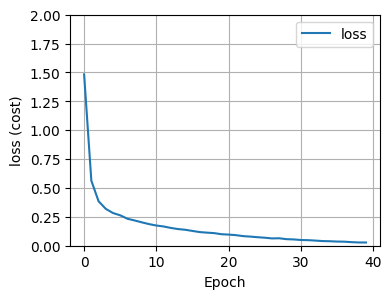

In [29]:
plot_loss_tf(history)

1/1 [==============================] - 0s 27ms/step


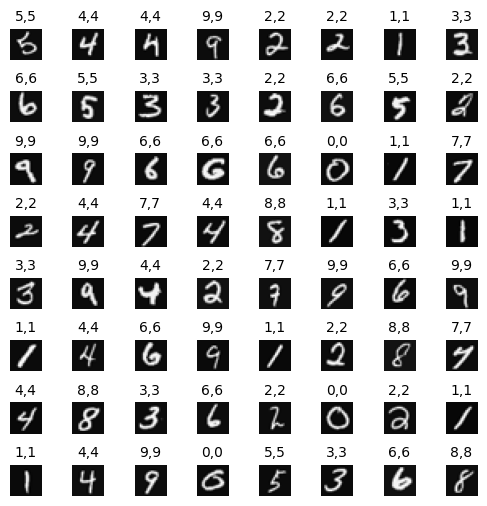

In [30]:
plot_images(X, y, model)